Import some basic librairies:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

## Q

Load the data from file ../data/happiness_long.csv, replace the zeros by NaNs, and draw boxplots by region and year.

Hint: to print the *x* labels with 45° rotation, get the object returned by the function for box plots (let us name it `ax`) and call:
```python
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
```

## A

In [2]:
df = pd.read_csv('../data/happiness_long.csv')

In [3]:
df_na = df.copy()
for col in ('gdp', 'health', 'generosity', 'social', 'corruption'):
    df_na.loc[df[col]==0, col] = np.nan

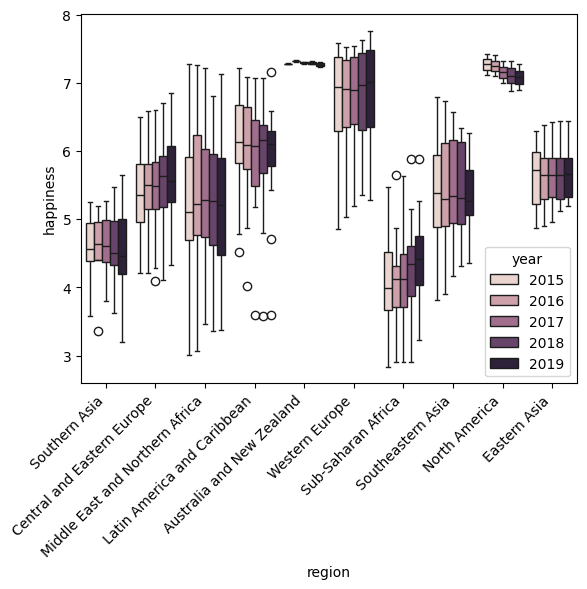

In [4]:
ax = sns.boxplot(df_na, x='region', y='happiness', hue='year')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right');

## Q

Let us start simple and fit a linear model of *happiness* as dependent variable, and *year* and *region* as independent variables.

Treat *year* as a categorical variable.

Print summary tables for the fitted model.

## A

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

first_model = smf.ols('happiness ~ C(year) + region', df_na).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     85.91
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          9.83e-136
Time:                        16:28:44   Log-Likelihood:                -759.36
No. Observations:                 720   AIC:                             1547.
Df Residuals:                     706   BIC:                             1611.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     7.2719      0.228     31.904      0.000       6.824       7.719
C(year)[T.2016]                              -0.0054      0.083     -0.065      0.948      -0.168       0.157
C(year)[T.2017]                               0.0049      0.083      0.060      0.952      -0.157       0.167
C(year)[T.2018]                               0.0355      0.083      0.429      0.668      -0.127       0.198
C(year)[T.2019]                               0.0786      0.083      0.951      0.342      -0.084       0.241
region[T.Central and Eastern Europe]         -1.8570      0.230     -8.086      0.000      -2.308      -1.406
region[T.Eastern Asia]                       -1.6430      0.256     -6.414      0.000      -2.146      -1.140
region[T.Latin America and Caribbean]        -1.2832      0.232     -5.527      0.000      -1.739      -0.827
region[T.Middle East and Northern Africa]    -2.0524      0.234     -8.776      0.000      -2.512      -1.593
region[T.North America]                      -0.1199      0.314     -0.382      0.702      -0.736       0.496
region[T.Southeastern Asia]                  -1.9051      0.248     -7.681      0.000      -2.392      -1.418
region[T.Southern Asia]                      -2.7139      0.252    -10.789      0.000      -3.208      -2.220
region[T.Sub-Saharan Africa]                 -3.1037      0.229    -13.559      0.000      -3.553      -2.654
region[T.Western Europe]                     -0.5540      0.232     -2.386      0.017      -1.010      -0.098
==============================================================================
Omnibus:                       28.123   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.064
Skew:                          -0.422   Prob(JB):                     6.61e-08
Kurtosis:                       3.624   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q

Carry out an ANOVA for the model and print a table with columns including degrees of freedom, sums of squares, *F* statistics and *p*-values..

Try again with interaction.

## A

In [6]:
sm.stats.anova_lm(first_model)

,df,sum_sq,mean_sq,F,PR(>F)
C(year),4.0,0.706667,0.176667,0.358946,8.378521e-01
region,9.0,548.985239,60.998360,123.934724,6.644456e-139
Residual,706.0,347.480032,0.492181,NaN,NaN


In [7]:
simple_model_with_interaction = smf.ols('happiness ~ C(year) * region', df_na).fit()
sm.stats.anova_lm(simple_model_with_interaction, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,106.142450,1.0,206.802018,4.606674e-41
C(year),0.003385,4.0,0.001649,9.999946e-01
region,116.787658,9.0,25.282505,1.483314e-37
C(year):region,3.598275,36.0,0.194741,1.000000e+00
Residual,343.881758,670.0,NaN,NaN


## Q

Perform pairwise *t* tests between regions. Print a table that includes *t* statistics, uncorrected and corrected *p*-values.

After using the default correction for multiple comparisons, try also Bonferroni.

## A

In [8]:
first_model.t_test_pairwise('region').result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Central and Eastern Europe-Australia and New Zealand,-1.856957,0.229638,-8.086446,2.673560e-15,-2.307813,-1.406102,7.485967e-14,True
Eastern Asia-Australia and New Zealand,-1.643033,0.256172,-6.413786,2.599316e-10,-2.145984,-1.140083,5.198631e-09,True
Latin America and Caribbean-Australia and New Zealand,-1.283190,0.232176,-5.526807,4.591153e-08,-1.739028,-0.827353,7.345842e-07,True
Middle East and Northern Africa-Australia and New Zealand,-2.052400,0.233852,-8.776486,1.260164e-17,-2.511529,-1.593271,3.780493e-16,True
North America-Australia and New Zealand,-0.119900,0.313746,-0.382157,7.024600e-01,-0.735886,0.496086,9.111157e-01,False
Southeastern Asia-Australia and New Zealand,-1.905125,0.248038,-7.680790,5.289571e-14,-2.392105,-1.418145,1.428184e-12,True
Southern Asia-Australia and New Zealand,-2.713943,0.251556,-10.788620,3.184912e-25,-3.207830,-2.220055,1.146568e-23,True
Sub-Saharan Africa-Australia and New Zealand,-3.103665,0.228896,-13.559263,2.168150e-37,-3.553063,-2.654266,8.455784e-36,True
Western Europe-Australia and New Zealand,-0.554010,0.232176,-2.386165,1.728767e-02,-1.009847,-0.098172,1.302163e-01,False
Eastern Asia-Central and Eastern Europe,0.213924,0.141144,1.515642,1.300574e-01,-0.063188,0.491036,4.793104e-01,False


In [9]:
first_model.t_test_pairwise('region', method='Bonferroni').result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-Bonferroni,reject-Bonferroni
Central and Eastern Europe-Australia and New Zealand,-1.856957,0.229638,-8.086446,2.673560e-15,-2.307813,-1.406102,1.203102e-13,True
Eastern Asia-Australia and New Zealand,-1.643033,0.256172,-6.413786,2.599316e-10,-2.145984,-1.140083,1.169692e-08,True
Latin America and Caribbean-Australia and New Zealand,-1.283190,0.232176,-5.526807,4.591153e-08,-1.739028,-0.827353,2.066019e-06,True
Middle East and Northern Africa-Australia and New Zealand,-2.052400,0.233852,-8.776486,1.260164e-17,-2.511529,-1.593271,5.670739e-16,True
North America-Australia and New Zealand,-0.119900,0.313746,-0.382157,7.024600e-01,-0.735886,0.496086,1.000000e+00,False
Southeastern Asia-Australia and New Zealand,-1.905125,0.248038,-7.680790,5.289571e-14,-2.392105,-1.418145,2.380307e-12,True
Southern Asia-Australia and New Zealand,-2.713943,0.251556,-10.788620,3.184912e-25,-3.207830,-2.220055,1.433211e-23,True
Sub-Saharan Africa-Australia and New Zealand,-3.103665,0.228896,-13.559263,2.168150e-37,-3.553063,-2.654266,9.756674e-36,True
Western Europe-Australia and New Zealand,-0.554010,0.232176,-2.386165,1.728767e-02,-1.009847,-0.098172,7.779450e-01,False
Eastern Asia-Central and Eastern Europe,0.213924,0.141144,1.515642,1.300574e-01,-0.063188,0.491036,1.000000e+00,False


## Q

Fit another linear model, still with *happiness* as the variable to explain, and with all the other columns as indenpendent variables, without interactions.

Exclude *year*.

Print summary tables again and interpret the suitability of the model for the data.

## A

In [10]:
complex_model = smf.ols('happiness ~ gdp + health + generosity + social + corruption + region', df_na).fit()
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     187.0
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          1.78e-223
Time:                        16:28:44   Log-Likelihood:                -526.08
No. Observations:                 703   AIC:                             1082.
Df Residuals:                     688   BIC:                             1150.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     3.4440      0.261     13.173      0.000       2.931       3.957
region[T.Central and Eastern Europe]         -0.7034      0.189     -3.722      0.000      -1.074      -0.332
region[T.Eastern Asia]                       -1.0444      0.199     -5.241      0.000      -1.436      -0.653
region[T.Latin America and Caribbean]        -0.0469      0.189     -0.248      0.804      -0.418       0.324
region[T.Middle East and Northern Africa]    -0.9100      0.190     -4.790      0.000      -1.283      -0.537
region[T.North America]                       0.0179      0.234      0.077      0.939      -0.441       0.476
region[T.Southeastern Asia]                  -0.7139      0.194     -3.682      0.000      -1.095      -0.333
region[T.Southern Asia]                      -0.8075      0.207     -3.898      0.000      -1.214      -0.401
region[T.Sub-Saharan Africa]                 -0.7005      0.209     -3.345      0.001      -1.112      -0.289
region[T.Western Europe]                     -0.2880      0.175     -1.644      0.101      -0.632       0.056
gdp                                           1.2510      0.094     13.240      0.000       1.065       1.436
health                                        1.3223      0.181      7.300      0.000       0.967       1.678
generosity                                    0.4806      0.197      2.434      0.015       0.093       0.868
social                                        0.3613      0.059      6.157      0.000       0.246       0.476
corruption                                    0.8737      0.225      3.887      0.000       0.432       1.315
==============================================================================
Omnibus:                       19.966   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.004
Skew:                          -0.396   Prob(JB):                     2.75e-05
Kurtosis:                       3.300   Cond. No.                         56.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q

Draw a QQ plot and histogram of the model's residuals.

## A

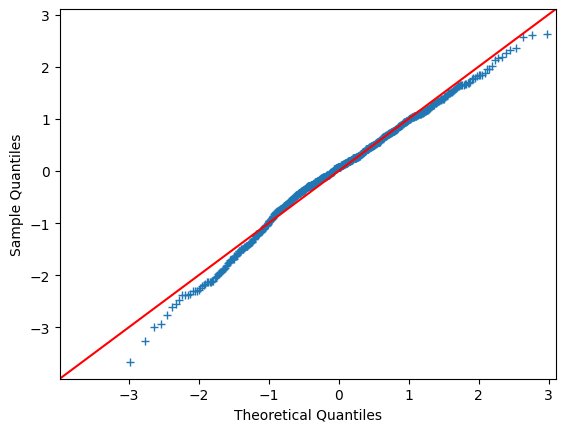

In [11]:
sm.graphics.qqplot(complex_model.resid, fit=True, line='45', fmt='b', marker='+');

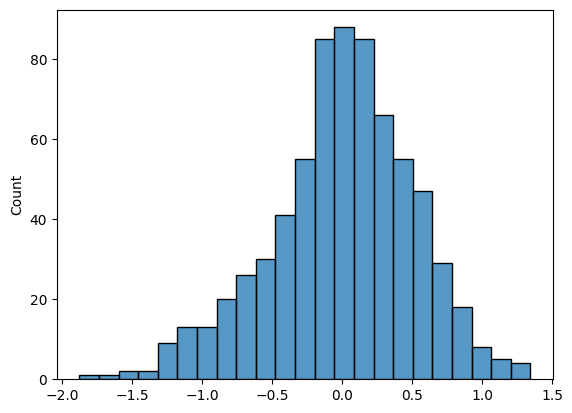

In [12]:
sns.histplot(complex_model.resid);

## Q

Draw KDE plots of the model's residuals, by region.

As a reference point, draw similar plots by year instead of region.


Hint: to move the legend out of the plotting area, get the object returned by the function for kde plots (let us name it `ax`) and call:
```python
ax.get_legend().set_bbox_to_anchor((1.04, 1))
```

## A

In [13]:
df_with_resid = df_na.copy()
df_with_resid['resid'] = complex_model.resid

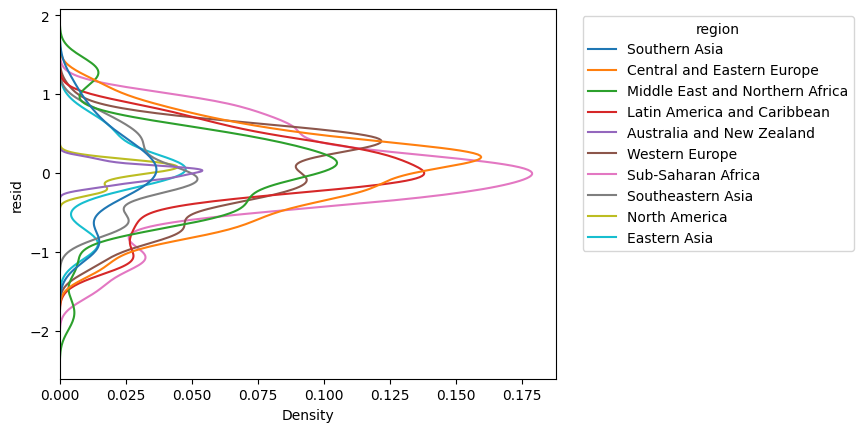

In [14]:
ax = sns.kdeplot(df_with_resid, y='resid', hue='region', bw_adjust=.75)
ax.get_legend().set_bbox_to_anchor((1.04, 1))

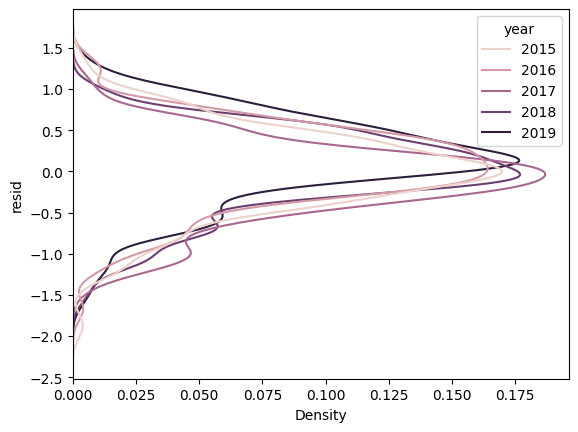

In [15]:
sns.kdeplot(df_with_resid, y='resid', hue='year', bw_adjust=.75);

Bonus: residuals *vs* predicted values, by region.

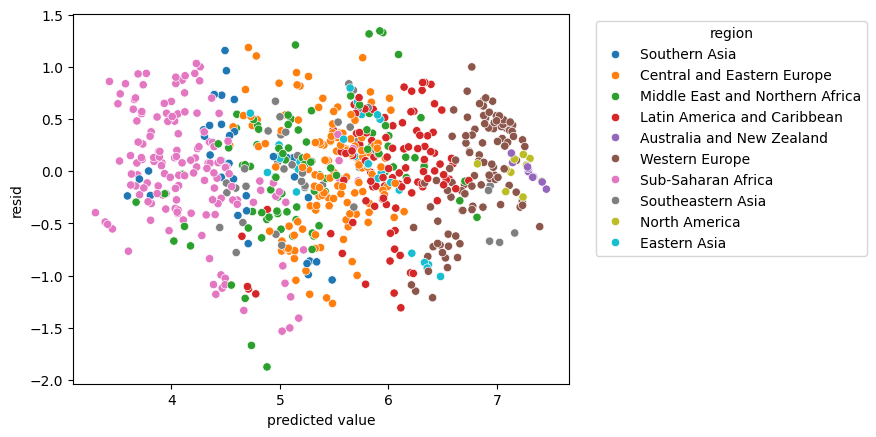

In [16]:
df_with_resid['predicted value'] = complex_model.fittedvalues
ax = sns.scatterplot(df_with_resid, x='predicted value', y='resid', hue='region')
ax.get_legend().set_bbox_to_anchor((1.04, 1))

## Q

Try other models with 2-factor interactions. Some interactions (or terms in the model) may not work.

## A

In [17]:
smf.ols('happiness ~ region * gdp + region * health + region * generosity + region * social + region * corruption', df_na).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     65.59
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          6.85e-233
Time:                        16:28:45   Log-Likelihood:                -392.99
No. Observations:                 703   AIC:                             906.0
Df Residuals:                     643   BIC:                             1179.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                7.3178     19.138      0.382      0.702     -30.263      44.899
region[T.Central and Eastern Europe]                    -4.8529     19.143     -0.254      0.800     -42.444      32.738
region[T.Eastern Asia]                                  -4.8225     19.160     -0.252      0.801     -42.447      32.802
region[T.Latin America and Caribbean]                   -5.0437     19.142     -0.263      0.792     -42.633      32.545
region[T.Middle East and Northern Africa]               -6.0513     19.140     -0.316      0.752     -43.636      31.534
region[T.North America]                                 -0.7654     20.990     -0.036      0.971     -41.982      40.451
region[T.Southeastern Asia]                             -4.9433     19.145     -0.258      0.796     -42.538      32.651
region[T.Southern Asia]                                 -4.1429     19.142     -0.216      0.829     -41.732      33.446
region[T.Sub-Saharan Africa]                            -3.9551     19.139     -0.207      0.836     -41.538      33.628
region[T.Western Europe]                                -7.2132     19.184     -0.376      0.707     -44.883      30.457
gdp                                                      0.2475      7.296      0.034      0.973     -14.079      14.574
region[T.Central and Eastern Europe]:gdp                 1.1736      7.299      0.161      0.872     -13.160      15.507
region[T.Eastern Asia]:gdp                               1.9910      7.332      0.272      0.786     -12.406      16.388
region[T.Latin America and Caribbean]:gdp                1.1039      7.301      0.151      0.880     -13.232      15.440
region[T.Middle East and Northern Africa]:gdp            1.4677      7.300      0.201      0.841     -12.867      15.802
region[T.North America]:gdp                             -0.4067      8.051     -0.051      0.960     -16.217      15.404
region[T.Southeastern Asia]:gdp                          1.2423      7.304      0.170      0.865     -13.101      15.586
region[T.Southern Asia]:gdp                             -0.2945      7.313     -0.040      0.968     -14.654      14.065
region[T.Sub-Saharan Africa]:gdp                         0.7443      7.298      0.102      0.919     -13.586      15.074
region[T.Western Europe]:gdp                             0.9936      7.314      0.136      0.892     -13.369      15.357
health                                                  -0.4385      7.554     -0.058      0.954     -15.272      14.396
region[T.Central and Eastern Europe]:health              1.6414      7.570      0.217      0.828     -13.223      16.506
region[T.Eastern Asia]:health                            1

We cannot analyse the interaction between *region* and any other independent variable. *region* has too many levels and fragments the data too much for the model to even be numerically valid.

We can still try other interactions, but cannot fix the issue of not-normally distributed residuals.

In [18]:
smf.ols('happiness ~ region + gdp * social + gdp * generosity + gdp * corruption + gdp * health + social * generosity + social * corruption + social * health + generosity * corruption + generosity * health + corruption * health', df_na).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          5.13e-223
Time:                        16:28:45   Log-Likelihood:                -501.12
No. Observations:                 703   AIC:                             1052.
Df Residuals:                     678   BIC:                             1166.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     4.2376      0.343     12.340      0.000       3.563       4.912
region[T.Central and Eastern Europe]         -0.5115      0.203     -2.526      0.012      -0.909      -0.114
region[T.Eastern Asia]                       -0.9476      0.210     -4.511      0.000      -1.360      -0.535
region[T.Latin America and Caribbean]         0.1370      0.203      0.674      0.501      -0.262       0.536
region[T.Middle East and Northern Africa]    -0.7476      0.206     -3.636      0.000      -1.151      -0.344
region[T.North America]                       0.0534      0.235      0.228      0.820      -0.407       0.514
region[T.Southeastern Asia]                  -0.5956      0.209     -2.844      0.005      -1.007      -0.184
region[T.Southern Asia]                      -0.6466      0.221     -2.929      0.004      -1.080      -0.213
region[T.Sub-Saharan Africa]                 -0.6767      0.218     -3.098      0.002      -1.106      -0.248
region[T.Western Europe]                     -0.2568      0.185     -1.391      0.165      -0.619       0.106
gdp                                           0.7462      0.332      2.247      0.025       0.094       1.398
social                                        0.2532      0.208      1.216      0.225      -0.156       0.662
gdp:social                                   -0.1906      0.231     -0.825      0.410      -0.644       0.263
generosity                                   -0.6277      0.764     -0.822      0.412      -2.128       0.872
gdp:generosity                                0.2017      0.807      0.250      0.803      -1.383       1.786
corruption                                   -2.2437      0.976     -2.299      0.022      -4.160      -0.328
gdp:corruption                                0.1719      0.799      0.215      0.830      -1.397       1.741
health                                        0.1604      0.564      0.284      0.776      -0.948       1.268
gdp:health                                    0.9096      0.337      2.703      0.007       0.249       1.570
social:generosity                             0.9568      0.505      1.894      0.059      -0.035       1.948
social:corruption                             1.8922      0.612      3.090      0.002       0.690       3.095
social:health                                -0.1441      0.392     -0.368      0.713      -0.913       0.625
generosity:corruption                        -4.2879      1.908     -2.247      0.025      -8.035      -0.541
generosity:health                             0.7435      1.516      0.491      0.624      -2.232       3.720
corruption:health                             2.6385      1.525      1.731      0.084      -0.355       5.632
===

## Q

Extract the data for European countries and fit yet another linear model on these data, excluding the *year* and *region* variables and without interactions.

## A

In [19]:
df_Europe = df_na.query('region=="Central and Eastern Europe" or region=="Western Europe"')
df_Europe

,country,region,year,happiness,gdp,health,generosity,social,corruption
1,Albania,Central and Eastern Europe,2015,4.959,0.87867,0.81325,0.14272,0.80434,0.06413
4,Armenia,Central and Eastern Europe,2015,4.350,0.76821,0.72990,0.07855,0.77711,0.03900
6,Austria,Western Europe,2015,7.200,1.33723,0.89042,0.33088,1.29704,0.18676
7,Azerbaijan,Central and Eastern Europe,2015,5.212,1.02389,0.64045,0.07799,0.93793,0.16065
10,Belarus,Central and Eastern Europe,2015,5.813,1.03192,0.73608,0.11046,1.23289,0.19090
...,...,...,...,...,...,...,...,...,...
701,Tajikistan,Central and Eastern Europe,2019,5.467,0.49300,0.71800,0.23000,0.38900,0.14400
708,Turkmenistan,Central and Eastern Europe,2019,5.247,1.05200,0.65700,0.24400,0.39400,0.02800
710,Ukraine,Central and Eastern Europe,2019,4.332,0.82000,0.73900,0.18700,0.17800,0.01000
711,United Kingdom,Western Europe,2019,7.054,1.33300,0.99600,0.34800,0.45000,0.27800


In [20]:
model_Europe = smf.ols('happiness ~ gdp + social + generosity + corruption + health', df_Europe).fit()
model_Europe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     144.1
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.18e-68
Time:                        16:28:45   Log-Likelihood:                -149.27
No. Observations:                 235   AIC:                             310.5
Df Residuals:                     229   BIC:                             331.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1279      0.214      9.963      0.000       1.707       2.549
gdp            1.2509      0.176      7.091      0.000       0.903       1.599
social         0.3336      0.088      3.800      0.000       0.161       0.507
generosity     1.6002      0.298      5.363      0.000       1.012       2.188
corruption     2.2466      0.290      7.738      0.000       1.674       2.819
health         1.8193      0.316      5.753      0.000       1.196       2.442
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.478
Skew:                          -0.094   Prob(JB):                        0.787
Kurtosis:                       2.884   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can introduce interactions. We cannot introduce all the interactions, though, not even most of the 2-factor interactions, otherwise the inference would fail with improper matrix conditionning. Some interactions do have a significant effet (*e.g.*  *generosity* \* *corruption*).

## Q

Carry out an ANOVA and print the corresponding table.

## A

In [21]:
sm.stats.anova_lm(model_Europe, typ=2)

,sum_sq,df,F,PR(>F)
gdp,10.762337,1.0,50.282156,1.640215e-11
social,3.090766,1.0,14.440207,1.854730e-04
generosity,6.155582,1.0,28.759177,2.000065e-07
corruption,12.814461,1.0,59.869778,3.214764e-13
health,7.084151,1.0,33.097496,2.791807e-08
Residual,49.014906,229.0,NaN,NaN


## Q

Let us get the raw data again, select the countries in a region, introduce an outlier and fit a linear model:

In [22]:
df_with_outlier = pd.read_csv('../data/happiness_long.csv').query('region=="Western Europe"')
df_with_outlier.loc[364, 'happiness'] = 5.0

In [23]:
import statsmodels.formula.api as smf
model_with_outlier = smf.ols('happiness ~ gdp + social + generosity + corruption + health', df_with_outlier).fit()

Plot the Cook's distance for the data and the model, and guess what the outliers are.

## A

In [24]:
model_with_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     53.19
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.54e-26
Time:                        16:28:45   Log-Likelihood:                -52.748
No. Observations:                 105   AIC:                             117.5
Df Residuals:                      99   BIC:                             133.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9507      1.098      0.866      0.389      -1.228       3.130
gdp            0.5806      0.468      1.242      0.217      -0.347       1.508
social         0.4281      0.140      3.056      0.003       0.150       0.706
generosity     1.6975      0.364      4.667      0.000       0.976       2.419
corruption     3.4996      0.409      8.552      0.000       2.688       4.312
health         3.6362      0.750      4.848      0.000       2.148       5.124
==============================================================================
Omnibus:                       54.387   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.064
Skew:                          -1.536   Prob(JB):                     5.78e-72
Kurtosis:                      11.096   Cond. No.                         75.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

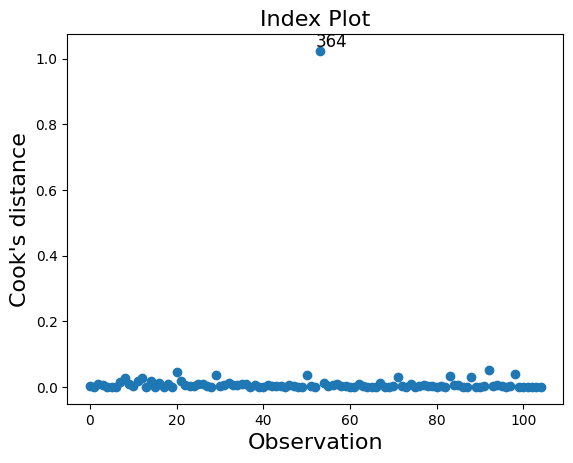

In [25]:
from statsmodels.stats.outliers_influence import OLSInfluence

diagnostics = OLSInfluence(model_with_outlier)
diagnostics.plot_index(threshold=0.8);

In [26]:
df_with_outlier.loc[364]

country           Luxembourg
region        Western Europe
year                    2017
happiness                5.0
gdp                 1.741944
health              0.845089
generosity          0.283181
social              1.457584
corruption          0.318834
Name: 364, dtype: object

## Q

What can we do with these outliers?

## A

The quality of the identified data point was compromised. We can only remove it.

In [27]:
df_without_outlier = df_with_outlier.drop(index=364)
model_without_outlier = smf.ols('happiness ~ gdp + social + generosity + corruption + health', df_without_outlier).fit()
model_without_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     87.13
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.71e-34
Time:                        16:28:45   Log-Likelihood:                -29.874
No. Observations:                 104   AIC:                             71.75
Df Residuals:                      98   BIC:                             87.61
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7933      0.917     -0.865      0.389      -2.613       1.027
gdp            1.6529      0.404      4.088      0.000       0.850       2.455
social         0.5110      0.114      4.499      0.000       0.286       0.736
generosity     1.5182      0.294      5.156      0.000       0.934       2.102
corruption     3.1246      0.334      9.355      0.000       2.462       3.787
health         4.0135      0.607      6.610      0.000       2.809       5.218
==============================================================================
Omnibus:                        0.906   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.544
Skew:                           0.159   Prob(JB):                        0.762
Kurtosis:                       3.156   Cond. No.                         77.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

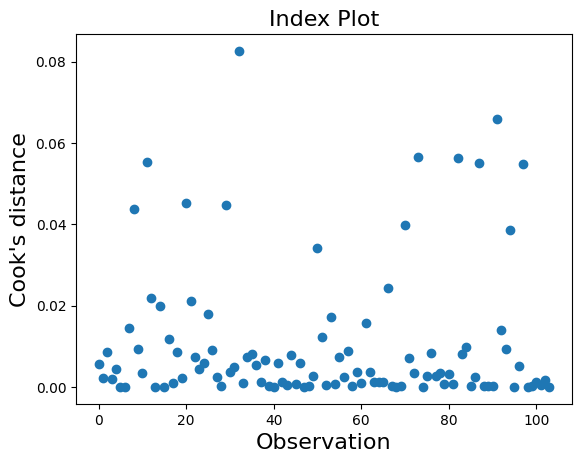

In [28]:
second_diagnostics = OLSInfluence(model_without_outlier)
second_diagnostics.plot_index(threshold=0.8);